Time As Value Array: [ 8.07 15.37  8.55 16.25  9.45 17.14 10.35 18.   11.28 18.46 12.22 19.31
 13.24 20.16  3.22 21.01  4.07 21.46  4.5  11.58  5.31 12.56  6.08 13.45
  6.47 14.25  7.22 15.    7.59 15.34  8.34 16.08  9.1  16.41  9.45 17.12
 10.21 17.45 10.57 18.15 11.38 18.48 12.25 19.2   2.22 19.52  2.58 20.3
  3.37 10.44  4.23 11.55  5.15 12.57  6.09 13.5   7.05 14.39  7.58 15.27
  8.5  16.1   9.4  16.52 10.3  17.34 11.19 18.12 12.1  18.49  1.32 19.24
  2.13 20.    2.54  9.54  3.39 11.15  4.29 12.22  5.21 13.14]
Time Array: ['8:07' '15:37' '8:55' '16:25' '9:45' '17:14' '10:35' '18:00' '11:28'
 '18:46' '12:22' '19:31' '13:24' '20:16' '3:22' '21:01' '4:07' '21:46'
 '4:50' '11:58' '5:31' '12:56' '6:08' '13:45' '6:47' '14:25' '7:22'
 '15:00' '7:59' '15:34' '8:34' '16:08' '9:10' '16:41' '9:45' '17:12'
 '10:21' '17:45' '10:57' '18:15' '11:38' '18:48' '12:25' '19:20' '2:22'
 '19:52' '2:58' '20:30' '3:37' '10:44' '4:23' '11:55' '5:15' '12:57'
 '6:09' '13:50' '7:05' '14:39' '7:58' '15:27' '8:

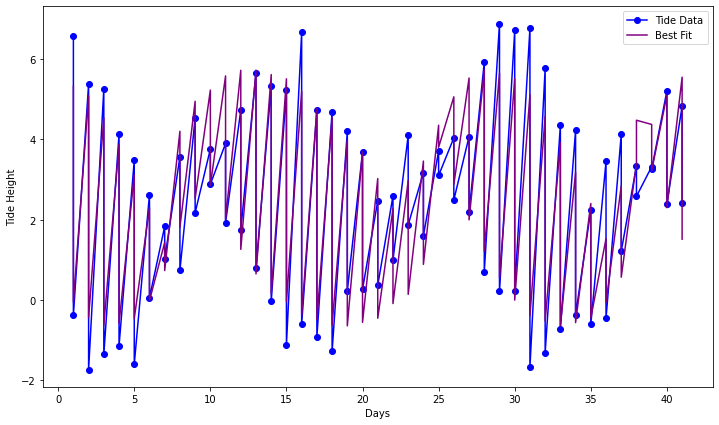

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

from scipy import optimize

#Curve fit function
def fitCurve(x, A, f, p):
    return A *np.sin(f * x + p)
    
dataArray = np.loadtxt('/Users/ChadFegley/Downloads/TideInformation.csv', dtype = "str", delimiter = ",")
    
dataList = dataArray.tolist()
    
tidesArray = np.array([])
    
dayArray = np.array([])

timeArray = np.array([])

timeAsValueArray = np.array([])
    
fig = plt.figure(figsize = (12,7))


    
for i in dataList:
        
    tidesArray = np.append(tidesArray, float(i[2]), axis = None)
        
    dayArray =np.append(dayArray, int(i[0]), axis = None)
    
    timeArray = np.append(timeArray, i[1], axis = None)

    
    
    
    
for i in timeArray:
    time = float(i.replace(':', "."))
    timeAsValueArray = np.append(timeAsValueArray, time)
    
print(f"Time As Value Array: {timeAsValueArray}")
    

    
    
    
singleDayArray = dayArray[0::2]

print(f"Time Array: {timeArray}")
        
    
    
    
    
    
    
#Calculate the mean of the tides
meanTides = np.mean(tidesArray)
meanTides = "{:.2f}".format(meanTides)
    
#Calculate the variation of the tides
varTides = np.var(tidesArray)
varTides = "{:.2f}".format(varTides)
    
#Calculate the standard deviation of the tides
standTides = np.std(tidesArray)
standTides = "{:.2f}".format(standTides)
    
print(f"The mean of the tides is: {meanTides}")
    
print(f"The variation of the tides is: {varTides}")
    
print(f"The standard deviation of the tides is {standTides}")


tideAmplitude = np.fabs(tidesArray - np.mean(tidesArray))
print(f"Tide Amplitude: {tideAmplitude}")



# print(f"F1 Value: {f1} F2 Value: {f2} P1 Value: {p1} P2 Value: {p2}" )



# params,params_cov = optimize.curve_fit(bestFit, dayArray, tidesArray)

# print(f"Params: {params}")



a_fit, cov = optimize.curve_fit(fitCurve, dayArray, tideAmplitude)
print(f"a_fit: {a_fit}")
        
plt.plot(dayArray, tidesArray,"b-o", label = 'Tide Data')

# plt.plot(dayArray, tideAmplitude, 'r')



cycle14 = np.array(tidesArray[0:28])

cycle28 = np.array(tidesArray[0:56])

cycle14Days = np.array(dayArray[0:28])

cycle28Days = np.array(dayArray[0:56])

print(f"Cycle 14: {cycle14}")

print(f"Cycle 28: {cycle28}")


cycle14Amplitude = np.fabs(cycle14 - np.mean(cycle14))

cycle28Amplitude = np.fabs(cycle28 - np.mean(cycle28))

print(f"Cycle 14 Amplitude: {cycle14Amplitude}")

print(f"Cycle 28 Amplitude: {cycle28Amplitude}")

# b_fit, cov = optimize.curve_fit(fitCurve, cycle14Days, cycle14Amplitude)
# print(f"b_fit: {b_fit}")

# c_fit, cov = optimize.curve_fit(fitCurve, cycle28Days, cycle28Amplitude)
# print(f"c_fit: {c_fit}")





#*************************************************
#Best Fit Curve Function
def bestFitCurve(x, a, b, c, d, e):
    return a*np.sin(x/b) * np.sin(x/c) + (x/d) + e
#*************************************************

popt, cov = optimize.curve_fit(bestFitCurve, timeAsValueArray, tidesArray)
print(f"Popt: {popt}")


plt.plot(dayArray, bestFitCurve(timeAsValueArray, *popt), color = 'purple', label = "Best Fit")







# plt.plot(cycle14Days, cycle14Amplitude, color = 'green')

# plt.plot(cycle28Days, cycle28Amplitude, color = 'purple')

# plt.plot(dayArray, bestFit(dayArray, A1, f1, p1, A2, f2, p2, meanTides))

# print(type(A1), type(f1), type(p1), type(A2), type(f2), type(p2), type(C), type(t))



plt.xlabel("Days")

plt.ylabel("Tide Height")

plt.legend()
    
plt.show()



    
# width = 0.5

# histmin = np.floor(min(tidesArray))

# histmax = np.ceil(max(tidesArray))

# bins = np.arange(histmin, histmax, width)

# plt.hist(tidesArray, bins = bins, alpha = 0.5, edgecolor = 'black')

# plt.axvline(np.std(tidesArray), color = 'red', linestyle = 'dashed', label = f"Standard Deviation: {standTides}")

# # plt.text(2.25, 4, f"Standard Deviation: {standTides}", ha = 'center', va = 'center', rotation = 'vertical')

# plt.legend()
    
    


In [39]:
# m = 2.0

# b = 1.0

# sigma = 2.0

# x = np.linspace(0,42., 41)

# y = m * x + b + np.random.normal(scale = sigma, size = 41)

# y_err = np.full(41, sigma)

# f = plt.figure(figsize=(7,7))

# plt.errorbar(dayArray, tidesArray, 1., fmt = 'o')



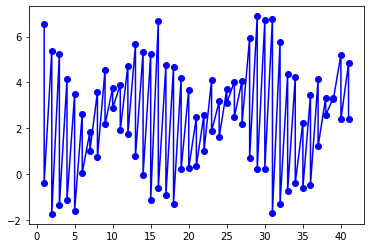

In [2]:
plt.plot(dayArray, tidesArray,"b-o", label = 'Tide Data')

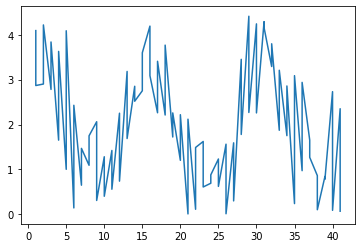

In [3]:
plt.plot(dayArray, np.fabs(tidesArray - np.mean(tidesArray)))